# Clustering

In this case study, we will use Data Mining algorithms to cluster iris flower samples based on features such as *petal width*, *petal length*, *sepal width*, and *sepal length*. 
* We will explore and visualise the available data.
* We will compare different clustering algorithms, namely: *k-means*, *hierarchical clustering*, and *DBSCAN*.
* We will evaluate the performance of the aforementioned algorithms.
* We will characterise the obtained clusters using *Apriori algorithm*.

<div style="text-align: center;">
    <img src="../img/blueflagiris_flower.jpg" width="300" height="200">
    <p><em>Iris flower.</em> Source: <a href="https://www.fs.usda.gov/wildflowers/beauty/iris/flower.shtml">https://www.fs.usda.gov/wildflowers/beauty/iris/flower.shtml</a></p>
</div>

<div style="text-align: center;">
    <img src="../img/iris-flower-types.png" width="500" height="200">
    <p><em>Iris flower.</em> Source: <a href="https://plainenglish.io/blog/iris-flower-classification-step-by-step-tutorial-c8728300dc9e">https://plainenglish.io/blog/iris-flower-classification-step-by-step-tutorial-c8728300dc9e</a></p>
</div>

**Note**: in this dataset, each entry is assigned to a class (a type of iris flower). However, in most real-world scenarios where we apply clustering procedures, true labels are unknown. So for the purpose of clustering, we will not consider the true class label.

## Task #1: Import Dataset and Libraries

In [227]:
# installation of required libraries and dependencies
# numeric calculations
! pip install numpy==1.26.0 
# data frames 
! pip install pandas==2.1.1 
# machine learning algorithms 
! pip install scikit-learn==1.5.1 
! pip install scipy==1.12.0
# plotting 
! pip install plotly==5.24.1 
! pip install matplotlib==3.8.0 
! pip install seaborn==0.13.2 
! pip install plotly-express==0.4.1 
! pip install chart-studio==1.1.0 
# web app library 
! pip install streamlit==1.37.1 
# association rules
! pip install mlxtend==0.23.3 

In [228]:
# load pandas to deal with the data
import pandas as pd
# plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
# load data from table file where entries are separated with a space
data = pd.read_table("../data/IrisDataset/data.all", sep=" ")
# show first 5 rows of the dataframe
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**QUESTIONS**

* How many samples exist in the dataframe?

*Hint*: you can check the number of rows of a dataframe using `len` function.
* What are the features? What are their types?

*Hint*: you can check the columns of a dataframe using [`columns`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html) attribute. To get a summarasied information about the data in a dataframe, you can use [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) method.
* How many distinct flower classes exist in the dataframe? What are they? 

*Hint*: you can use the methods [`nunique()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html) and [`unique()`](https://pandas.pydata.org/docs/reference/api/pandas.unique.html).

In [230]:
# ANSWERS
print('taille : ')
print(len(data))
print("nombre de colonnes : ")
print(data.columns)

for column in data.columns:
    print("la colonne : ")
    print(column)
    print(data[column].unique())
    print(data[column].nunique())
    print("-------------------")


taille : 
150
nombre de colonnes : 
Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')
la colonne : 
sepal length
[5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
35
-------------------
la colonne : 
sepal width
[3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
23
-------------------
la colonne : 
petal length
[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
43
-------------------
la colonne : 
petal width
[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
22
-------------------
la colonne : 
class
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
3
-------------------


YOUR COMMENT: TO COMPLETE

In [231]:
# ANSWERS


## Task #2: Perform Exploratory Data Analysis

First, we will explore the most common **data quality issues**:
* [missing values](#missing-vals)
* [duplicates](#duplicates)

Second, we will use [**descriptive statistics**](#desc-stats) to have get a statistical summary of the data. 

We will then use [**data visualisaiton**](#data-vis) to get a better understanding of the data.

<a id="missing-vals"></a>
### Missing Values

To check the missing values, several approaches can be used:

1. The `info()` mwthods provides a summary of a dataframe in terms of the types of values, non-null values and memory usage. Thus, by comparing the number of non-null values of each column with the total number of entries, one can have an idea of missing values.
2. Using the [`isna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) method. By summing the resulting values, we obtain the number of null values for each column.
3. To get the rows with any missing values, you can use `isna()` followed by `any(axis=1)`.

In [232]:
# method 1: info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


As there are as many non-null values for each of the attributes (`150 non-null`) than the total number of rows (see `RangeIndes: 150 entries`), it means that there is no *missin values* in our DataFrame.

In [233]:
# method 2: using isna() 
data.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

Again, we can see that there is no missing values in the DataFrame.

In [234]:
# method 3: get the rwos with missing values
data[data.isna().any(axis=1)]

,sepal length,sepal width,petal length,petal width,class


The return DataFrame is empty.

To **remove** the rows with missing values, you can use the [`dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) method. Check the parameters for more details.

*Tip*: keep a track of the number of rows in the initial DataFrame and during and after the cleaning:
```
print(f"Before: {len(df)}")
df_cleaned = df.dropna()
print(f"After: {len(df_cleaned)}")
```

In [235]:
print(f"Initial: {len(data)}")
data_cleaned = data.dropna()
print(f"After removing missing values: {len(data_cleaned)}")

Initial: 150
After removing missing values: 150


<a id="duplicates"></a>
### Duplicates

To check duplicated values, you can use the [`duplicated()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html) method. You can specify the paramater `keep` (`'first'`, `'last'`, `False`) to determine which duplicates (if any) to be maked as `True` in the resulting boolean Series indicating duplicate rows.

In [236]:
# check the duplicates
data_cleaned.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [237]:
# check the duplicates of the class column and keep the last occurence
data_cleaned['class'].duplicated(keep='last')

0       True
1       True
2       True
3       True
4       True
       ...  
145     True
146     True
147     True
148     True
149    False
Name: class, Length: 150, dtype: bool

In [238]:
# another option using subset parameter
data_cleaned.duplicated(subset=['class'], keep='last')

0       True
1       True
2       True
3       True
4       True
       ...  
145     True
146     True
147     True
148     True
149    False
Length: 150, dtype: bool

In [239]:
# count the number of duplicates
data_cleaned.duplicated().sum()

1

We can see that there is one case of duplicates. Let's check the corresponding rows. We set the parameter `keep=False` to display all rows and not just the second occurence:

In [240]:
data_cleaned[data_cleaned.duplicated(keep=False)]

,sepal length,sepal width,petal length,petal width,class
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


We can keep these rows or we can drop them (or any of them) using [`drop_duplicates`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html). Let's keep the first occurrence.

In [241]:
# remove duplicates
data_cleaned = data_cleaned.drop_duplicates(keep='first')
# show the stats
print(f"Initial: {len(data)}")
print(f"After removing duplicates: {len(data_cleaned)}")


Initial: 150
After removing duplicates: 149


Save the cleaned DataFrame to `data/processed/data_cleaned.csv`.

In [242]:
# save to file
data_cleaned.to_csv('../data/processed/data_cleaned.csv')

<a id='desc-stats'></a>
### Descriptive Statistics

To obtain the statistical summary of the dataframe, we can use [`describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html). For different columns, it displays the count, the average value, the standard deviation, the min and max values, percentiles. 
By default, in mixed data types DataFrames, it displays the values for quantative data only:

In [243]:
# summarised statistics
data_cleaned.describe()

,sepal length,sepal width,petal length,petal width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [244]:
# summarised statistics with object data
data_cleaned.describe(include='all')

,sepal length,sepal width,petal length,petal width,class
count,149.000000,149.000000,149.000000,149.000000,149
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843624,3.059732,3.748993,1.194631,NaN
std,0.830851,0.436342,1.767791,0.762622,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.300000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


Based on the range of values of the quantative attributes, we can see that their scales are comparable. So there is no need to scale them for futher use in algorithms.

To obtain the number of values for `class` column, we can use [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html):

In [245]:
print(data_cleaned['class'].value_counts())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     49
Name: count, dtype: int64


**QUESTIONS**

* Select the samples with the largest `sepal length`. Which type of iris flower it belongs to?

In [246]:
# ANSWERS
# Select the samples with the largest `sepal length`. Which type of iris flower it belongs to?
data_cleaned[data_cleaned['sepal length'].max() == data_cleaned['sepal length']]

,sepal length,sepal width,petal length,petal width,class
131,7.9,3.8,6.4,2.0,Iris-virginica


<a id='data-vis'></a>
### Data Visualisation

* [Pairplot](#pairplot)
* [Correlation analysis](#correlation)
* [Class-wise boxplot](#boxplot)
* [Scatter plot with PCA](#pca)

<a id='pairplot'></a>
#### Pairplot

**QUESTIONS:**

- Let's start by plotting a pairplot using [`seaborn.paiplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html). 

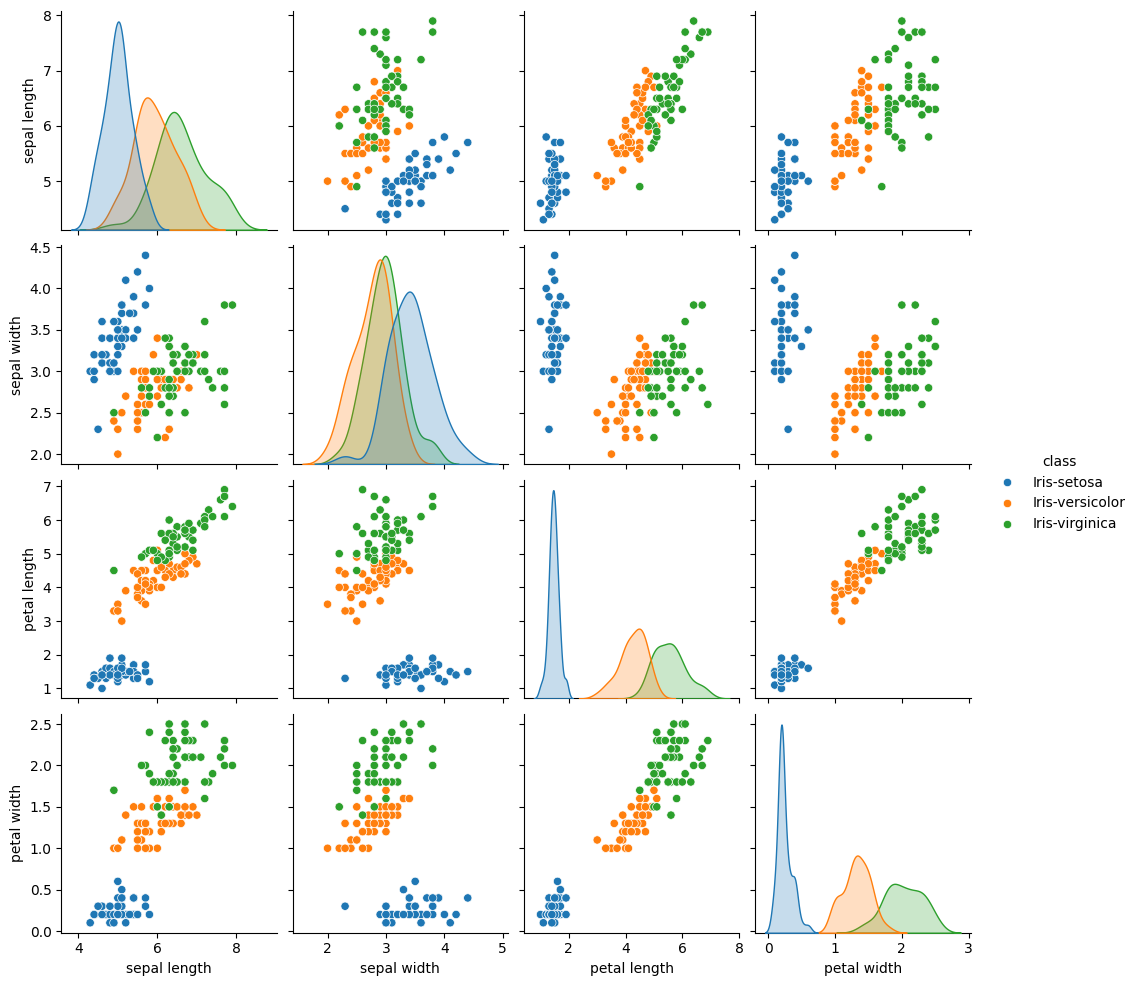

In [247]:
# ANSWER
# select columns to plot
cols = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
# Plot the pairplot
sns.pairplot(data_cleaned[cols], hue='class')



From this plot, we can observe the following:
* there is a strong positive linear relationship between `petal width` and `petal length`
* we can observe two distinct groups, see `sepal length` vs. `petal length` for example or `petal length` vs. `petal width`. This can already give us an initial idea about a potential number of clusters and which features may influence more the separation.


We can make use of the `class` column to have a look on the data through the class labels. We will assign colors based on the value of `class`. To do so, we will assign the value to `hue` parameter. Mind that by default, the diagonal elements will disply a layered kernel density estimate (KDE). To change that, you can assign value to the `diag_kind` parameter.

<Figure size 2000x2000 with 0 Axes>

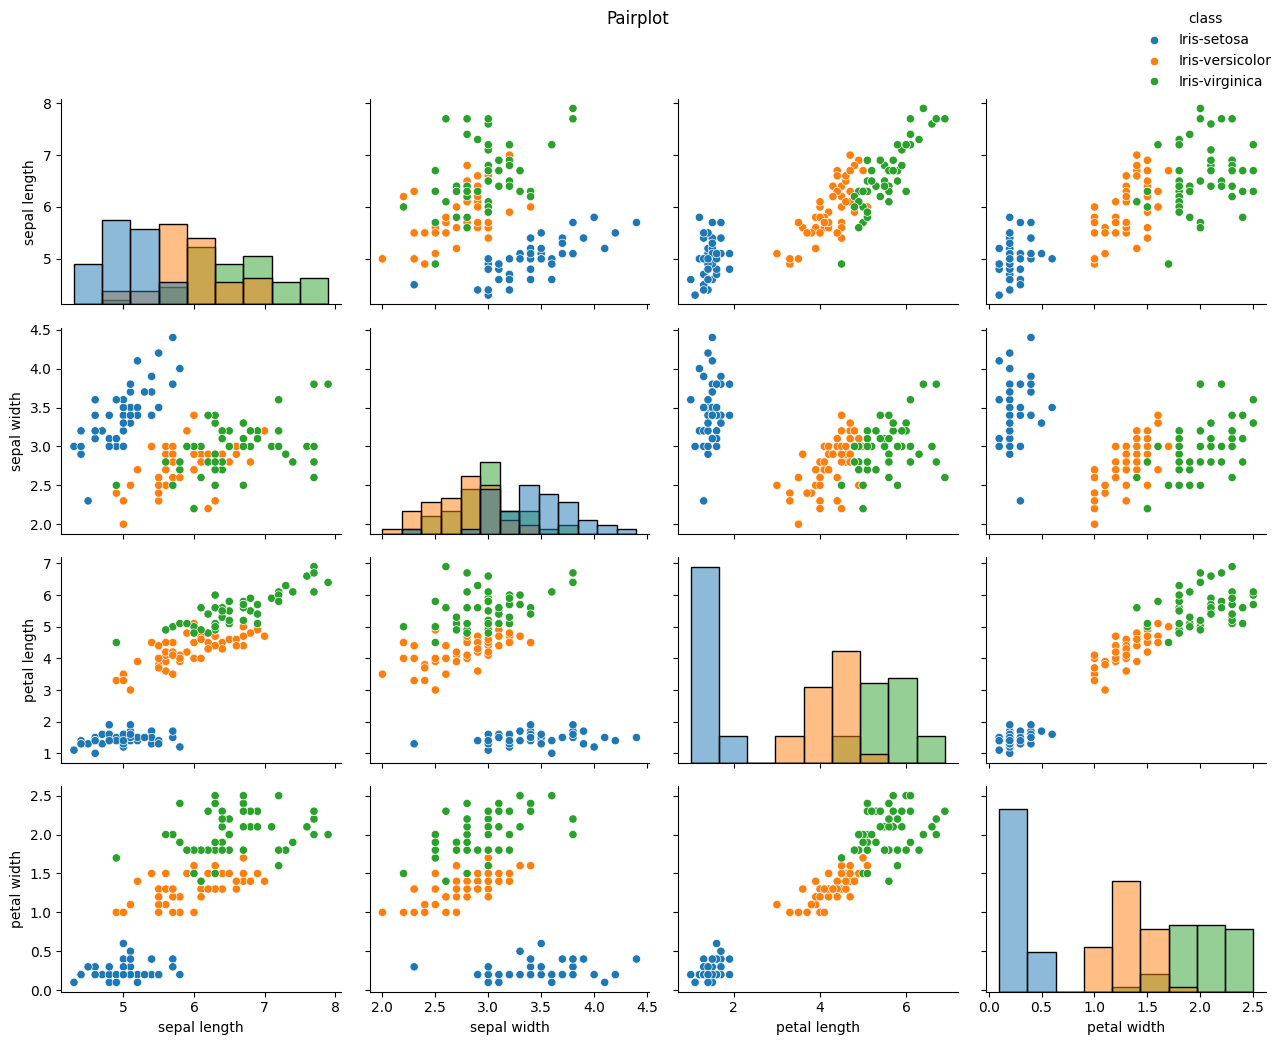

In [248]:
# Plot the pairplot
fig = plt.figure(figsize = (20,20))
# pair plot
g = sns.pairplot(data=data_cleaned[cols], hue='class', diag_kind='hist')
# add a title to the figure
g.figure.suptitle('Pairplot', y=1.04)
# Remove the default legend
g._legend.remove() 
# Add new legend
g.add_legend(loc='upper right')
# Adjust the layout to prevent title overlap
plt.tight_layout()

When using colors, we can see that a groups that stands apart corresponds to `Iris-setosa`. We can also observe that some values of `Iris-versicolor` and `Iris-virginica` are similar. This implied that a separation of the entries of these two classes might be difficult.

**Note**: in this use case, there are true class labels which is not usually the case. 

<a id='correlation'></a>
#### Correlation Analysis

**QUESTION**

* Plot the correlation matrix and comment on the result.

*Hint*: to calculate correlations, use the [`corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) method of a DataFrame.

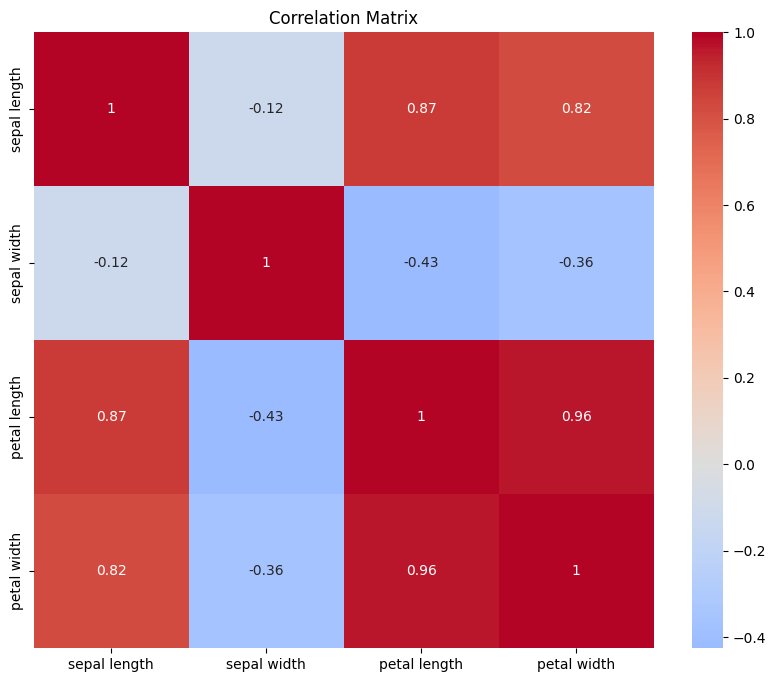

In [249]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# ANSWER
# plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data_cleaned[features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()



YOUR COMMENT: 
big correlation between petal length and petal width as well as between sepal length and petal width and length 

We can visualise this correlation matrix using a heatmap:

<Axes: >

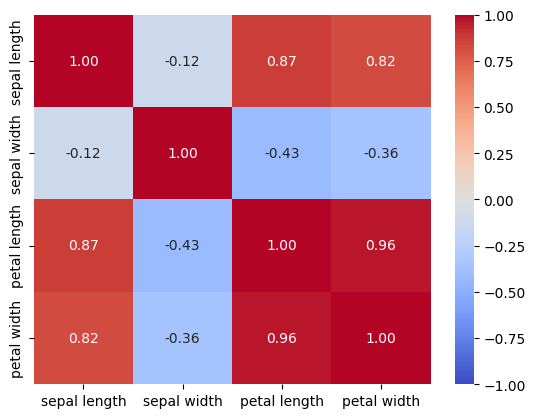

In [250]:
# Create heatmap
sns.heatmap(
        data_cleaned[features].corr(),
        annot=True,  # Show correlation values
        cmap='coolwarm',  # Color scheme: red for positive, blue for negative
        vmin=-1, vmax=1,  # Fix scale between -1 and 1
        center=0,  # Center colormap at 0
        fmt='.2f'  # Format correlation values to 2 decimal places
    )

<a id='boxplot'></a>
#### Class-wise Boxplot

Let's display boxplots of each feature using [`seaborn.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot).

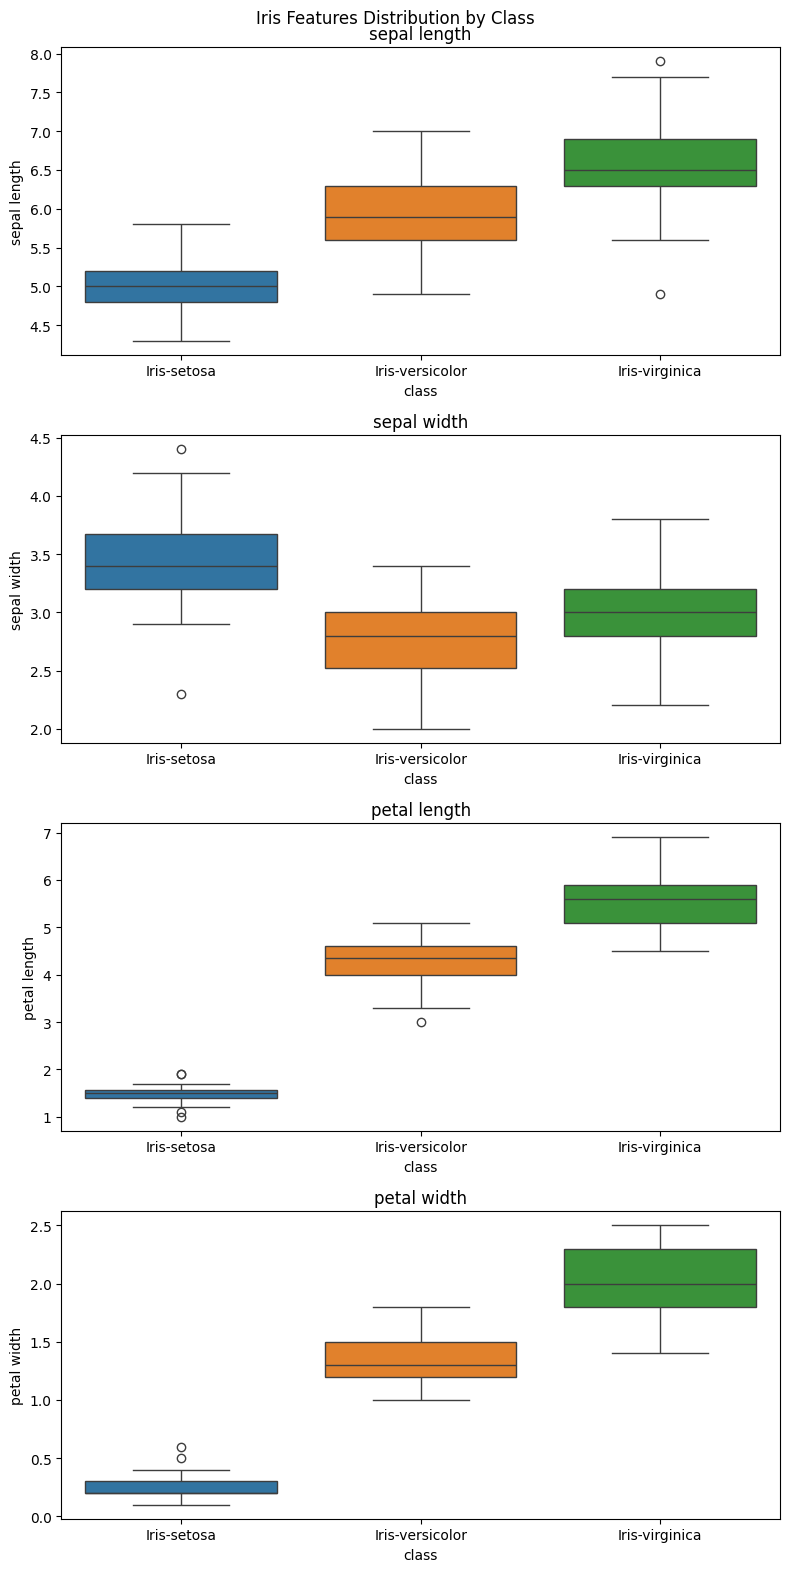

In [251]:
fig, axes = plt.subplots(4, 1, figsize=(8, 16))
fig.suptitle('Iris Features Distribution by Class')

for ax, feature in zip(axes, features):
    sns.boxplot(data=data_cleaned, x='class', y=feature, ax=ax, hue='class')
    ax.set_title(feature)

plt.tight_layout()

**QUESTION:**

* Comment

they close in sepal width but then they all have a great correlation when it comes to sepal width/length and petal width/lentgh

<a id='pca'></a>
#### Scatter Plot with PCA

As there are four attributes that make it hard to visualise the whole dataset in one plot, we may want to use [*Principal Component Analysis* (PCA)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [252]:
# principal compomemt analysis
from sklearn.decomposition import PCA

In [253]:
# create PCA model with 2 components
pca = PCA(n_components=2)
# apply PCA to numerical data
pca_result = pca.fit_transform(data_cleaned[features])

**QUESTIONS**

* Create a DataFrame `pca_df` containing the result of PCA. This DataFrame should contain 2 columns: `PC1` and `PC2`
* Create a new DataFrame `data_cleaned_pca` by contactenating `data_cleaned` and `pca_df`. Mind that the index of `data_cleaned` has been modified during the cleaning step. Reset the index before concatenation.


In [254]:
# ANSWER
# create a new dataframe with the PCA results, it should contain 2 columns PC1 and PC2
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
# create a new dataframe data_cleaned_pca by concatenating the pca_df with data_cleaned. Mind that the index of data_cleaned has been modified by the previous operations, so you need to reset the index before concatenating
data_cleaned_pca = pd.concat([data_cleaned.reset_index(drop=True), pca_df], axis=1)



In [255]:
# create interactive plots
import plotly.express as px 

In [256]:
# Create interactive scatter plot
fig = px.scatter(
        data_cleaned_pca,
        x='PC1',
        y='PC2',
        color='class',
        title='PCA visualization of all flowers'
)
# Add variance explained
var_explained = pca.explained_variance_ratio_
fig.update_layout(
        xaxis_title=f"PC1 ({var_explained[0]:.1%} variance explained)",
        yaxis_title=f"PC2 ({var_explained[1]:.1%} variance explained)"
)
%pip install nbformat
fig.show()

Note: you may need to restart the kernel to use updated packages.


To check the contributions of each feature to principal components, let's see the loadings. Loadings are given by `eigenvectors * sqrt(explained variance)` (Eigenvectors are unit-scaled loadings. They show direction of maximum variance). Basically, loadings are the correlations between variables and components.

In [257]:
# numeric calculations
import numpy as np

**QUESTIONS**

* Calculate PCA `loadings`
* Create a DataFrame for them. Display this DataFrame
* Comment on the results

In [258]:
# ANSWER
# Calculate PCA loadings, create a DF for them and display it 
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(data=loadings, columns=['PC1', 'PC2'], index=features)
loadings_df


,PC1,PC2
sepal length,0.747134,0.320714
sepal width,-0.172894,0.361416
petal length,1.764020,-0.085547
petal width,0.737109,-0.035575


* PC1 est grandement influencé par sepal width et faiblement par sepal length et petal width et pas du tout par petal length
* PC2 est influencé par sepal length et width et pas par petal length et width

## Task #3: Prepare Data for Clustering

We are going to create clusters without the use of `class` attribute. So let's drop this column.

**QUESTIONS**

* Create a DataFrame `df_clustering` by droping the column `class`

In [259]:
# ANSWER
# create a df df_clustering by dropping the class column 
df_clustering = data_cleaned.drop(columns='class')

Even though in our case the attributes have comparable scales, let's apply a [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Recall, that for a given value `x`, a standard score is given by $z = \frac{x - mean(\mathbf{x})}{std(\mathbf{x})}$ 

In [260]:
# scaler
from sklearn.preprocessing import StandardScaler

In [261]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clustering)
# show
print(scaled_data)
# create a DataFrame
scaled_data_df = pd.DataFrame(data=scaled_data, columns=df_clustering.columns)
scaled_data_df.head()

[[-0.8980334   1.01240113 -1.33325507 -1.30862368]
 [-1.13956224 -0.1373532  -1.33325507 -1.30862368]
 [-1.38109108  0.32254853 -1.39001364 -1.30862368]
 [-1.5018555   0.09259766 -1.2764965  -1.30862368]
 [-1.01879782  1.242352   -1.33325507 -1.30862368]
 [-0.53574014  1.9322046  -1.16297935 -1.04548613]
 [-1.5018555   0.78245027 -1.33325507 -1.17705491]
 [-1.01879782  0.78245027 -1.2764965  -1.30862368]
 [-1.74338434 -0.36730407 -1.33325507 -1.30862368]
 [-1.13956224  0.09259766 -1.2764965  -1.44019246]
 [-0.53574014  1.47230287 -1.2764965  -1.30862368]
 [-1.26032666  0.78245027 -1.21973792 -1.30862368]
 [-1.26032666 -0.1373532  -1.33325507 -1.44019246]
 [-1.86414876 -0.1373532  -1.50353079 -1.44019246]
 [-0.05268246  2.16215547 -1.44677222 -1.30862368]
 [-0.17344688  3.08195894 -1.2764965  -1.04548613]
 [-0.53574014  1.9322046  -1.39001364 -1.04548613]
 [-0.8980334   1.01240113 -1.33325507 -1.17705491]
 [-0.17344688  1.70225374 -1.16297935 -1.17705491]
 [-0.8980334   1.70225374 -1.27

,sepal length,sepal width,petal length,petal width
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624


## Task #4: Apply k-means Clustering and Find the Optimal Number of Clusters using Elbow Method

To apply **k-means clustering**, we are going to use [`sklearn.cluster.KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). 

Mind that this algorithm requires a number of clusters as a parameter `k`. Let's first try `k=3` and then find the optimal number of clusters.

In [262]:
# k-means
from sklearn.cluster import KMeans

In [263]:
# number of clusters 
k = 3
# create a model
kmeans = KMeans(n_clusters=k, init='k-means++')
# fit scaled data
kmeans.fit(scaled_data_df)

KMeans(n_clusters=3)

We can check the associated labels using `labels_` attribute.

In [264]:
# associated cluster labels
labels = kmeans.labels_
print(f"k-means labels: {labels}")

k-means labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 0 2 2
 0 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 2 2 2 0 2 2
 0]


To see the sum of squared distances of samples to their closest cluster center, use `inertia_` attribute:

In [265]:
# sum of squared distances
inertia = kmeans.inertia_
print(f"Sum of squared distances: {inertia}")

Sum of squared distances: 139.0385753744116


This value can be used for finding the optimal number of clusters using the *Elbow method*. To do that let's vary the number of clusters `k`, apply k-means algorithm and store the corresponding intertia values. Then, let's plot the result and determine the best `k`.

**QUESTIONS**

* Find the optimal `k` using Elbow method

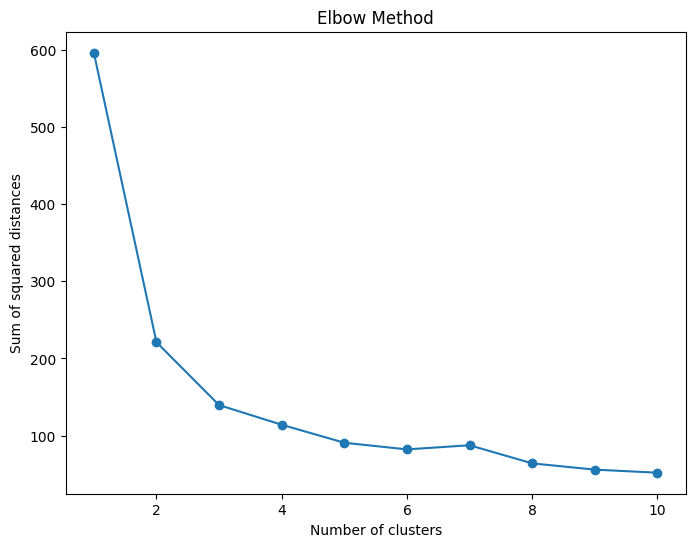

In [170]:
# ANSWER
# find the optimal number of clusters using the elbow method
inertia_values = []
# try different number of clusters
k_values = range(1, 11)
for k in k_values:
    # create a model
    kmeans = KMeans(n_clusters=k, init='k-means++')
    # fit the scaled data
    kmeans.fit(scaled_data_df)
    # calculate the sum of squared distances
    inertia = kmeans.inertia_
    # append the inertia to the list
    inertia_values.append(inertia)

# plot the elbow method
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()



YOUR COMMENT: TO COMPLETE

**QUESTIONS**

* Add a column `cluster kmeans` to the `data_cleaned` DataFrame containing the labels of k-means clustering for `k=3`

In [267]:
# ANSWER
# add a column 'cluster' to the data_cleaned_pca dataframe with the cluster labels for k=3
data_cleaned_pca['cluster'] = labels
# show the first 5 rows
data_cleaned_pca.head()



,sepal length,sepal width,petal length,petal width,class,PC1,PC2,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,-2.674170,0.319032,1
1,4.9,3.0,1.4,0.2,Iris-setosa,-2.704744,-0.178634,1
2,4.7,3.2,1.3,0.2,Iris-setosa,-2.879708,-0.144700,1
3,4.6,3.1,1.5,0.2,Iris-setosa,-2.736313,-0.318120,1
4,5.0,3.6,1.4,0.2,Iris-setosa,-2.718834,0.327305,1


## Task #5: Cluster Evaluation using Silhouette Coefficient

To evaluate the quality of the clustering, we can use **Silhouette Coefficient**. The Silhouette Coefficient for a sample is given by $(b - a) / max(a, b)$ where `b` is the distance between a sample and the nearest cluster that the sample is not a part of, and `a` is the mean intra-cluster distance (i.e. the mean distance between a sample and all other samples in the same cluster). 

The silhouette score ranges from -1 to 1 and indicates how well each data point fits within its assigned cluster:

* Score near +1 means:
    - The data point is far from neighboring clusters
    - The point is well-matched to its cluster
    - Indicates very distinct, well-separated clustering
* Score near 0 means:
    - The data point is close to the decision boundary between clusters
    - The point could potentially belong to either cluster
    - Suggests overlapping or not well-defined clusters
* Score near -1 means:
    - The data point might be assigned to the wrong cluster
    - The point is closer to points in another cluster than its own
    - Indicates poor clustering or potential misassignments

We can use [`sklearn.metrics.silhouette_score`](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.silhouette_score.html) and [`sklearn.metrics.silhouette_samples`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html)

In [268]:
# silhouette scores
from sklearn.metrics import silhouette_score, silhouette_samples

**QUESTIONS**

* For k-means clustering with `k=3`, calculate Silhouette score for each data point, for each cluster and average silhouette score 
* Display Silhouette score plot
* Comment

In [269]:
# ANSWER
# For k-means clustering with `k=3`, calculate Silhouette score for each data point, for each cluster and average silhouette score for all data points
silhouette_avg = silhouette_score(scaled_data_df, labels)
print(f"Silhouette average score: {silhouette_avg}")

Silhouette average score: 0.4633712933873768


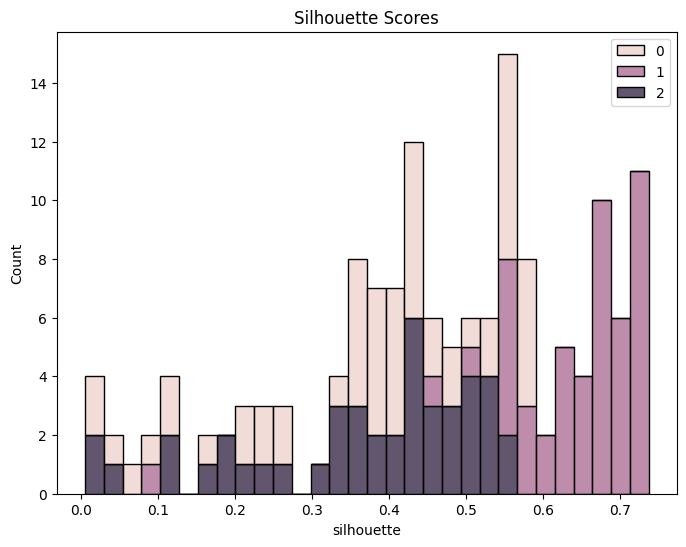

In [270]:
# ANSWER
# calculate the silhouette score for each cluster 
silhouette_values = silhouette_samples(scaled_data_df, labels)
# create a new df with the silhouette values
silhouette_df = pd.DataFrame(data=silhouette_values, columns=['silhouette'], index=data_cleaned_pca.index)
# plot the silhouette for each data point within each cluster
plt.figure(figsize=(8, 6))
sns.histplot(data=silhouette_df, x='silhouette', hue=labels, multiple='stack', bins=30)
plt.title('Silhouette Scores')
plt.show()


Answer
* the 1st cluster has all its points with a silhouette score over 0.6
* the 2nd and 3rd clusters strugle a bit, their points vary between -0.02 and 0.6 but they have great concentration around 0.5


As general guidelines, the plot can be interpreted by looking at:
* *the thickness of the clusters (number of points)*;
* check if any cluster has many negative values;
* check the consistency of the silhouette widths within clusters;
* the average value. Recall that in general, the following interpretation applies:
    - \> 0.7: Strong clustering structure
    - 0.5 - 0.7: Reasonable clustering structure
    - 0.25 - 0.5: Weak clustering structure
    - < 0.25: No substantial clustering structure


* Cluster Silhouette scores. 

YOUR COMMENT: TO COMPLETE

## Task 6: Apply Hierarchical Clustering

**QUESTIONS**

* Apply Agglomerative clustering with different linkage options: complete, average, single. 

*Hint*: use [`sklearn.cluster.AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)
* For each linkage, draw a dendrogram.
* Calculate the silhouette scores

In [271]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

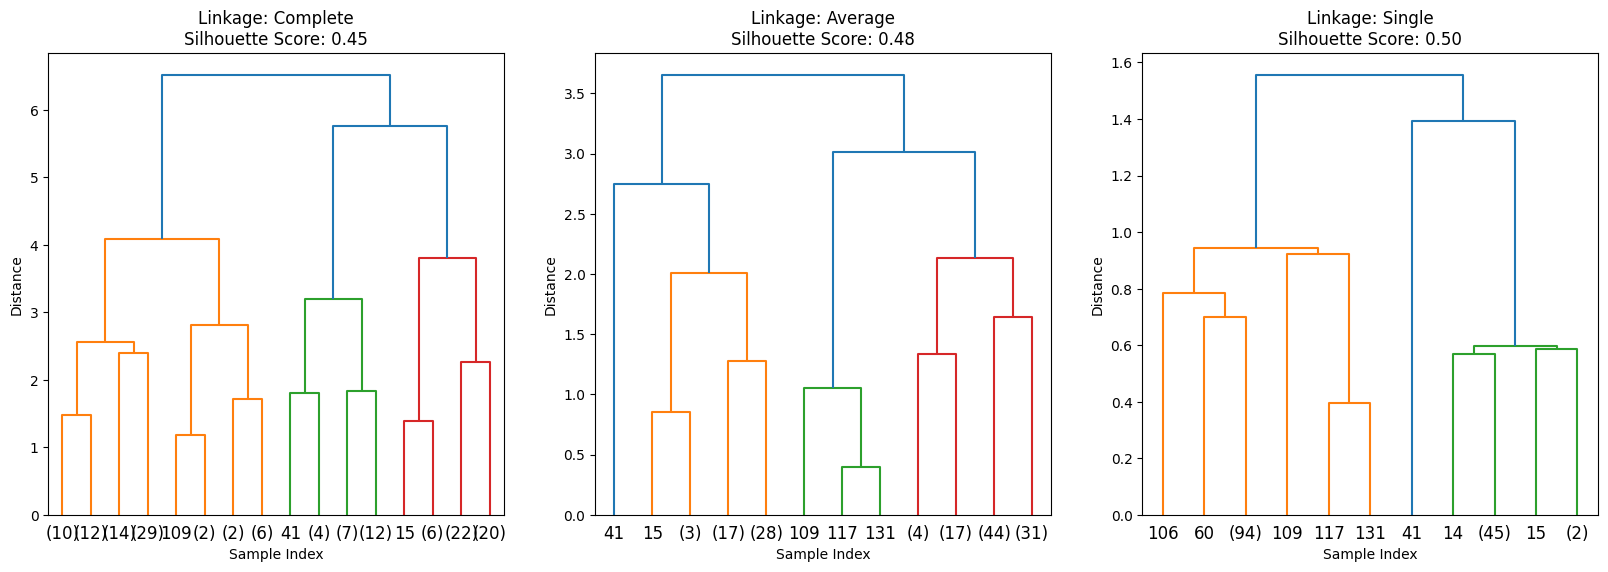

In [278]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

# Liste des méthodes de linkage
linkage_methods = ['complete', 'average', 'single']

# Créer une figure avec des sous-graphiques
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Itérer sur les méthodes de linkage
for ax, method in zip(axes, linkage_methods):
    # Étape 1 : Créer une matrice de linkage avec scipy
    Z = linkage(scaled_data_df, method=method)
    
    # Étape 2 : Créer un dendrogramme
    dendrogram(
        Z,
        truncate_mode='level',  # Limiter la profondeur
        p=3,                    # Nombre de niveaux à afficher
        ax=ax
    )
    
    # Étape 3 : Créer et ajuster le modèle AgglomerativeClustering
    agg = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels = agg.fit_predict(scaled_data_df)
    
    # Étape 4 : Calculer le score de silhouette
    silhouette_avg = silhouette_score(scaled_data_df, labels)
    
    # Étape 5 : Afficher le score dans le titre
    ax.set_title(f'Linkage: {method.capitalize()}\nSilhouette Score: {silhouette_avg:.2f}')
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('Distance')

# Afficher la figure
plt.show()


In [83]:
# ANSWER
# calculate the silhouette score for each cluster


## Task 7: Apply DBSCAN

**QUESTIONS**

* Apply [sklearn.cluster.DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) algorithm
* Identify the best values for `eps` and `min_sanples` by varying the values within a range and by using Silhouette coefficient
* Apply DBSCAN with the best parameters found
* Print number of clusters and noise points

In [274]:
# DBSCAN
from sklearn.cluster import DBSCAN

In [303]:
# Plages de valeurs à tester
eps_values = np.linspace(0.1, 1.0, 10)
min_samples_values = range(2, 10)

# Variables pour suivre les meilleurs paramètres et le meilleur score
best_eps = None
best_min_samples = None
best_silhouette = -1

# Tester toutes les combinaisons de eps et min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        # Appliquer DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_data_df)
        
        # Ignorer les cas où tous les points sont dans un cluster ou bruit
        if len(set(labels)) <= 1:
            continue
        
        # Calculer le score de silhouette
        silhouette_avg = silhouette_score(scaled_data_df, labels)
        
        # Garder les meilleurs paramètres
        if silhouette_avg > best_silhouette:
            best_silhouette = silhouette_avg
            best_eps = eps
            best_min_samples = min_samples

# Appliquer DBSCAN avec les meilleurs paramètres trouvés
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
final_labels = best_dbscan.fit_predict(scaled_data_df)

# Nombre de clusters et points de bruit
n_clusters = len(set(final_labels)) - (1 if -1 in final_labels else 0)
n_noise_points = list(final_labels).count(-1)

# Résultats
print(f"Meilleurs paramètres : eps={best_eps:.2f}, min_samples={best_min_samples}")
print(f"Nombre de clusters : {n_clusters}")
print(f"Nombre de points de bruit : {n_noise_points}")
print(f"Score de silhouette : {best_silhouette:.2f}")


Meilleurs paramètres : eps=1.00, min_samples=4
Nombre de clusters : 2
Nombre de points de bruit : 3
Score de silhouette : 0.54


In [281]:
# ANSWER
print(scaled_data_df)

     sepal length  sepal width  petal length  petal width
0       -0.898033     1.012401     -1.333255    -1.308624
1       -1.139562    -0.137353     -1.333255    -1.308624
2       -1.381091     0.322549     -1.390014    -1.308624
3       -1.501855     0.092598     -1.276496    -1.308624
4       -1.018798     1.242352     -1.333255    -1.308624
..            ...          ...           ...          ...
144      1.034197    -0.137353      0.823571     1.454321
145      0.551140    -1.287108      0.710054     0.928046
146      0.792668    -0.137353      0.823571     1.059614
147      0.430375     0.782450      0.937088     1.454321
148      0.068082    -0.137353      0.766812     0.796477

[149 rows x 4 columns]


## Task 8: Cluster Characterisation using Apriori algorithm

Now, we would like to describe the obtained cluster. To do so, let's use frequent pattern mining and in particular **Apriori algorithm**. 

**QUESTIONS**
* First, convert numerical features to categorical (low, medium, high) based on quantiles. Add binary columns, e.g. `sepal length low`, `sepal length medium`, `sepal length high` depending on the values

In [304]:
# ANSWER
# First, convert numerical features to categorical (low, medium, high) based on quantiles. Add binary columns, e.g. `sepal length low`, `sepal length medium`, `sepal length high` depending on the values
# create a new dataframe df_clustering_cat
df_clustering_cat = df_clustering.copy()
# define the quantiles
quantiles = df_clustering.quantile([0.25, 0.5, 0.75])
# iterate over the columns
for column in df_clustering.columns:
    # create new columns based on the quantiles
    df_clustering_cat[f'{column} low'] = df_clustering[column] <= quantiles.loc[0.25, column]
    df_clustering_cat[f'{column} medium'] = (df_clustering[column] > quantiles.loc[0.25, column]) & (df_clustering[column] <= quantiles.loc[0.75, column])
    df_clustering_cat[f'{column} high'] = df_clustering[column] > quantiles.loc[0.75, column]
# show the first 5 rows
df_clustering_cat.head()



,sepal length,sepal width,petal length,petal width,sepal length low,sepal length medium,sepal length high,sepal width low,sepal width medium,sepal width high,petal length low,petal length medium,petal length high,petal width low,petal width medium,petal width high
0,5.1,3.5,1.4,0.2,True,False,False,False,False,True,True,False,False,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False,False,True,False,True,False,False,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False,False,True,False,True,False,False,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False,False,True,False,True,False,False,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False,False,False,True,True,False,False,True,False,False


To find association, we are going to use [mlxtend.frequent_patterns.apriori](https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/).

In [295]:
# frequent patterns
from mlxtend.frequent_patterns import apriori

In [310]:
# Ajouter les étiquettes de cluster au DataFrame binaire
df_clustering_cat['cluster'] = final_labels

# Filtrer les colonnes binaires dans le DataFrame
binary_columns = [col for col in df_clustering_cat.columns if set(df_clustering_cat[col].unique()).issubset({0, 1, True, False})]

# Créer un DataFrame contenant uniquement les colonnes binaires
df_binary = df_clustering_cat[binary_columns]

# Ajouter les étiquettes de cluster à df_binary pour filtrage par cluster
df_binary['cluster'] = df_clustering_cat['cluster']

print(df_binary.columns)

Index(['sepal length low', 'sepal length medium', 'sepal length high',
       'sepal width low', 'sepal width medium', 'sepal width high',
       'petal length low', 'petal length medium', 'petal length high',
       'petal width low', 'petal width medium', 'petal width high', 'cluster'],
      dtype='object')


/var/folders/r2/gpm53c192dsgzq8bxk_h_nph0000gn/T/ipykernel_26502/2444859158.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [312]:
from mlxtend.frequent_patterns import apriori

# Initialiser une liste pour stocker les motifs fréquents par cluster
frequent_patterns = []

# Parcourir chaque cluster
for cluster in df_binary['cluster'].unique():
    if cluster == -1:  # Ignorer les points bruités (-1) si présents
        continue
    
    # Filtrer les données pour le cluster actuel
    cluster_data = df_binary[df_binary['cluster'] == cluster].drop(columns=['cluster'])
    
    # Appliquer l'algorithme apriori
    frequent_itemsets = apriori(cluster_data, min_support=0.1, use_colnames=True)
    frequent_patterns.append((cluster, frequent_itemsets))


In [313]:
# Trouver les motifs uniques pour chaque cluster
unique_patterns = []

for cluster, frequent_itemsets in frequent_patterns:
    # Copier les motifs fréquents pour pouvoir les filtrer
    cluster_unique_patterns = frequent_itemsets.copy()
    
    # Comparer avec les motifs des autres clusters
    for other_cluster, other_frequent_itemsets in frequent_patterns:
        if other_cluster == cluster:
            continue
        
        # Retirer les motifs fréquents dans les autres clusters
        cluster_unique_patterns = cluster_unique_patterns[
            ~cluster_unique_patterns['itemsets'].isin(other_frequent_itemsets['itemsets'])
        ]
    
    # Ajouter les motifs uniques pour ce cluster
    unique_patterns.append((cluster, cluster_unique_patterns))


In [314]:
# Afficher les motifs uniques par cluster
for cluster, patterns in unique_patterns:
    print(f"Cluster {cluster} - Motifs uniques :")
    print(patterns)


Cluster 0 - Motifs uniques :
     support                                           itemsets
0   0.714286                                 (sepal length low)
3   0.632653                                 (sepal width high)
4   0.877551                                 (petal length low)
6   0.816327                                  (petal width low)
8   0.367347             (sepal width medium, sepal length low)
9   0.346939               (sepal length low, sepal width high)
10  0.653061               (petal length low, sepal length low)
11  0.612245                (petal width low, sepal length low)
12  0.102041             (petal width medium, sepal length low)
13  0.285714            (sepal length medium, sepal width high)
14  0.224490            (petal length low, sepal length medium)
15  0.204082             (petal width low, sepal length medium)
16  0.346939             (petal length low, sepal width medium)
17  0.346939              (petal width low, sepal width medium)
18  0.53061

**QUESTIONS**

* Use apriori algorithm to find frequent patterns for each cluster
* Then among these itemsets, find those that are not frequent for other clusters